### Analyze the impact of sample size on NB classifier performance

In [7]:
#define the function to calculate the accuracy for a given dataset

import nltk, re, string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def NB_accuracy(inputfile):
    
    df = pd.read_csv(inputfile)
    texts = df.narratives.tolist()
    target = df.label.tolist()
    stop_words = stopwords.words('english')
    stop_words += ["xx", "xxxx"]
    
    #tokenize
    newtexts = []
    for text in texts:
        tokens = nltk.word_tokenize(text.lower())
        text_tokens = [token.strip() for token in tokens \
                   if token.strip() not in stop_words \
                   and token.strip() not in string.punctuation]
        newtext = " ".join(text_tokens)
        newtexts.append(newtext)
    
    #tf-idf
    tfidf_vect = TfidfVectorizer(min_df=10) 
    tf_idf = tfidf_vect.fit_transform(newtexts)
    
    #Naive Bayes classification
    X_train, X_test, y_train, y_test = train_test_split(\
                tf_idf, target, test_size=0.3, random_state=0, stratify=target)
    clf = MultinomialNB(alpha=0.1).fit(X_train, y_train)
    predicted = clf.predict(X_test)
    labels = sorted(list(set(target)))

    accuracy = accuracy_score(y_test, predicted)
    
    return accuracy



In [8]:
# calculate the accuracy of the Naive Bayes classification for each dataset of specific sample size

accuracy = []

accuracy.append(NB_accuracy("sample_10000.csv"))
accuracy.append(NB_accuracy("sample_20000.csv"))
accuracy.append(NB_accuracy("sample_30000.csv"))
accuracy.append(NB_accuracy("sample_40000.csv"))
accuracy.append(NB_accuracy("sample_50000.csv"))
accuracy.append(NB_accuracy("sample_60000.csv"))
accuracy.append(NB_accuracy("sample_70000.csv"))
accuracy.append(NB_accuracy("sample_80000.csv"))

accuracy

[0.44592790387182912,
 0.49884450313634865,
 0.50748420002217542,
 0.51412853213303322,
 0.51293850873682811,
 0.52089585417361339,
 0.52457845098599598,
 0.5274848926859762]

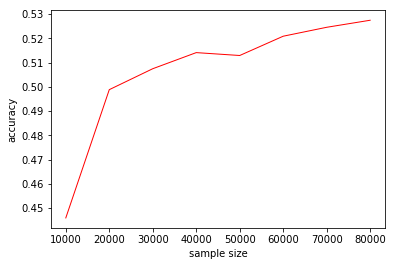

In [9]:
#draw a line chart show the relationship between sample size and accuracy
import matplotlib.pyplot as plt

df1 = pd.DataFrame({'samplesize': range(10000,90000,10000), 'accuracy': accuracy})
plt.plot(df1['samplesize'],df1['accuracy'], color='red', linewidth=1)
plt.xlabel("sample size")
plt.ylabel("accuracy")
plt.show()